# Two-Factor Factorial Experiments
## Example 14-1 Aircraft Primer Paint

In [1]:
import pandas as pd
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline

In [2]:
df = pd.read_excel('table 14-1.xlsx')
df.head()

,PrimerType,Method,Adhesion
0,1,Dipping,4.0
1,1,Dipping,4.5
2,1,Dipping,4.3
3,1,Spraying,5.4
4,1,Spraying,4.9


In [3]:
res = smf.ols('Adhesion ~ C(PrimerType) * C(Method)', data=df).fit()
anova_lm(res)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
C(PrimerType),2.0,4.581111,2.290556,27.858108,0.000031
C(Method),1.0,4.908889,4.908889,59.702703,0.000005
C(PrimerType):C(Method),2.0,0.241111,0.120556,1.466216,0.269342
Residual,12.0,0.986667,0.082222,NaN,NaN


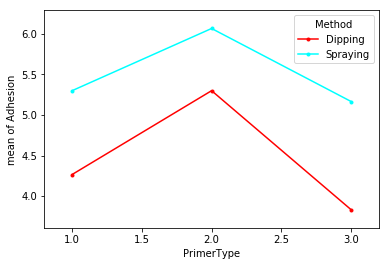

In [4]:
interaction_plot(df['PrimerType'], df['Method'], df['Adhesion']);

## Problem 14-3
In the book Design and Analysis of Experiments,
8th edition (2012, John Wiley & Sons), the results of an experiment
involving a storage battery used in the launching mechanism
of a shoulder-fired ground-to-air missile were presented.
Three material types can be used to make the battery plates.
The objective is to design a battery that is relatively unaffected
by the ambient temperature. The output response from the
battery is effective life in hours. Three temperature levels are
selected, and a factorial experiment with four replicates is run.

In [5]:
df = pd.read_excel('problem 14-3.xlsx')
df.head()

,Material,Temperature,BatteryLife
0,1,Low,130
1,1,Low,74
2,2,Low,150
3,2,Low,159
4,3,Low,138


In [6]:
res = smf.ols('BatteryLife ~ C(Material) * C(Temperature)', data=df).fit()
anova_lm(res)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
C(Material),2.0,10683.722222,5341.861111,7.911372,1.976083e-03
C(Temperature),2.0,39118.722222,19559.361111,28.967692,1.908596e-07
C(Material):C(Temperature),4.0,9613.777778,2403.444444,3.559535,1.861117e-02
Residual,27.0,18230.750000,675.212963,NaN,NaN


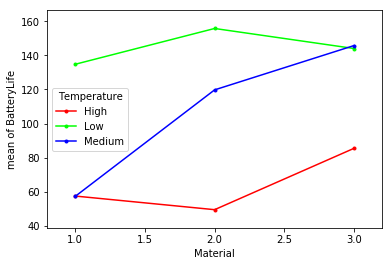

In [7]:
interaction_plot(df['Material'], df['Temperature'], df['BatteryLife']);

## ¿Qué pasa si no se hubiese medido la temperatura en el nivel medio?

In [8]:
df2 = df[df['Temperature']!='Medium']
df2.head()

,Material,Temperature,BatteryLife
0,1,Low,130
1,1,Low,74
2,2,Low,150
3,2,Low,159
4,3,Low,138


In [9]:
res = smf.ols('BatteryLife ~ C(Material) * C(Temperature)', data=df2).fit()
anova_lm(res)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
C(Material),2.0,1429.750000,714.875000,0.884108,0.430274
C(Temperature),1.0,39042.666667,39042.666667,48.285273,0.000002
C(Material):C(Temperature),2.0,2315.083333,1157.541667,1.431568,0.264872
Residual,18.0,14554.500000,808.583333,NaN,NaN


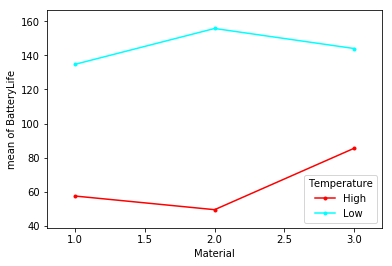

In [10]:
interaction_plot(df2['Material'], df2['Temperature'], df2['BatteryLife']);